In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
news = pd.read_excel("./news/reuters_headlines.xlsx")

In [4]:
news

,Unnamed: 0,Headlines,Time,Description
0,7,Evictions nearly back to pre-pandemic levels i...,Jul 17 2020,Landlords in some areas of the United States a...
1,8,Google bans ads on coronavirus conspiracy theo...,Jul 17 2020,Alphabet Inc's Google said on Friday it would ...
2,29,Fed opens 'Main Street' loan program to nonpro...,Jul 17 2020,The U.S. Federal Reserve on Friday opened its ...
3,57,Microsoft trims jobs as it enters new fiscal year,Jul 16 2020,Microsoft Corp said on Thursday it had trimmed...
4,72,"Rising U.S. coronavirus cases slam stocks, pus...",Jul 16 2020,Government debt yields and global equity marke...
...,...,...,...,...
3185,32721,Social media stocks tumble as Wall Street fear...,Mar 20 2018,"Shares of Facebook, Twitter and Snapchat-owner..."
3186,32730,Amazon is now second most valuable U.S.-listed...,Mar 20 2018,Amazon.com became the second most valuable pu...
3187,32733,Global stocks get lift from oil prices; Fed be...,Mar 20 2018,"NEW YORK, 2018 - A rise in oil prices to three..."
3188,32750,"Exclusive: On Amazon, a quarter of merchants' ...",Mar 20 2018,Amazon.com Inc is making a push for merchants ...


In [5]:
news['Date'] = pd.to_datetime(news['Time']).dt.strftime('%Y-%m-%d')

In [6]:
news = news.set_index('Date')
news = news.drop(columns=['Unnamed: 0', 'Headlines', 'Time'])
news = news[::-1]

In [7]:
news

,Description
Date,
2018-03-20,Alphabet Inc's Google is launching the Google...
2018-03-20,Amazon.com Inc is making a push for merchants ...
2018-03-20,"NEW YORK, 2018 - A rise in oil prices to three..."
2018-03-20,Amazon.com became the second most valuable pu...
2018-03-20,"Shares of Facebook, Twitter and Snapchat-owner..."
...,...
2020-07-16,Government debt yields and global equity marke...
2020-07-16,Microsoft Corp said on Thursday it had trimmed...
2020-07-17,The U.S. Federal Reserve on Friday opened its ...


In [8]:
news.index.min()

'2018-03-20'

In [9]:
news.index.max()

'2020-07-17'

In [10]:
news['Description'][2]

/tmp/ipykernel_32017/2965014706.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  news['Description'][2]


'NEW YORK, 2018 - A rise in oil prices to three-week highs helped lift equity markets worldwide on Tuesday, while the U.S. dollar jumped ahead of a meeting of Federal Reserve policymakers, who are expected to go ahead with the first of at least three U.S. rate hikes this year.'

In [11]:
new_per_day = news.groupby(by='Date').agg({'Description': ' '.join})

In [12]:
new_per_day

,Description
Date,
2018-03-20,Alphabet Inc's Google is launching the Google...
2018-03-21,"Nordea, the Nordic region's biggest bank, will..."
2018-03-22,Investors' expectations for three or four rate...
2018-03-23,The threat of a trade war sent world stock mar...
2018-03-25,The quartet of technology stocks that has driv...
...,...
2020-07-13,The Federal Reserve's $3 trillion bid to stave...
2020-07-14,Alphabet Inc's Google is in advanced talks to ...
2020-07-15,EU antitrust enforcers are asking interested p...


In [13]:
print(new_per_day['Description'][0])

Alphabet Inc's  Google is launching the Google News Initiative, to weed out fake news online and during breaking news situations, it said in a blog post on Tuesday. Amazon.com Inc is making a push for merchants on its website to sell goods into other countries, setting the stage for greater competition with rival marketplaces run by eBay Inc and potentially Alibaba Group Holding Ltd. NEW YORK, 2018 - A rise in oil prices to three-week highs helped lift equity markets worldwide on Tuesday, while the U.S. dollar jumped ahead of a meeting of Federal Reserve policymakers, who are expected to go ahead with the first of at least three U.S. rate hikes this year. Amazon.com  became the second most valuable publicly listed U.S. company on Tuesday, surpassing Google parent Alphabet Inc  for the first time. Shares of Facebook, Twitter and Snapchat-owner Snap fell further on Tuesday as Wall Street fretted over potential regulatory scrutiny that could hobble the business of the social networks.


/tmp/ipykernel_32017/2962695683.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(new_per_day['Description'][0])


In [14]:
temp = new_per_day.copy(deep=True)
temp = temp.reset_index()
temp.loc[:, 'group'] = temp.index//7
temp.head(10)

,Date,Description,group
0,2018-03-20,Alphabet Inc's Google is launching the Google...,0
1,2018-03-21,"Nordea, the Nordic region's biggest bank, will...",0
2,2018-03-22,Investors' expectations for three or four rate...,0
3,2018-03-23,The threat of a trade war sent world stock mar...,0
4,2018-03-25,The quartet of technology stocks that has driv...,0
5,2018-03-26,Shoppers are making more quick trips to Whole ...,0
6,2018-03-27,Amazon.com Inc and French retail group Casino...,0
7,2018-03-28,There are no specific U.S. policy changes at t...,1
8,2018-03-29,"Between lobbying, campaign contributions and p...",1
9,2018-03-30,Online retailing behemoth Amazon.com Inc has ...,1


In [15]:
new_per_week = temp.groupby(by='group').agg({'Date':'max', 'Description': ' '.join})

In [16]:
new_per_week

,Date,Description
group,,
0,2018-03-27,Alphabet Inc's Google is launching the Google...
1,2018-04-04,There are no specific U.S. policy changes at t...
2,2018-04-12,Janet Yellen cashed in with her first paid vis...
3,2018-04-22,Investors are optimistic that a pickup in corp...
4,2018-04-30,A gauge of global equity markets declined on M...
...,...,...
96,2020-06-14,With a full three months of responding to a gl...
97,2020-06-23,Stock market gains have further to run and inv...
98,2020-06-30,Alphabet Inc's Google said on Wednesday it wil...


In [17]:
new_per_week = new_per_week.set_index('Date', drop=True)
new_per_week

,Description
Date,
2018-03-27,Alphabet Inc's Google is launching the Google...
2018-04-04,There are no specific U.S. policy changes at t...
2018-04-12,Janet Yellen cashed in with her first paid vis...
2018-04-22,Investors are optimistic that a pickup in corp...
2018-04-30,A gauge of global equity markets declined on M...
...,...
2020-06-14,With a full three months of responding to a gl...
2020-06-23,Stock market gains have further to run and inv...
2020-06-30,Alphabet Inc's Google said on Wednesday it wil...


In [18]:
new_per_week.iloc[0]['Description']

'Alphabet Inc\'s  Google is launching the Google News Initiative, to weed out fake news online and during breaking news situations, it said in a blog post on Tuesday. Amazon.com Inc is making a push for merchants on its website to sell goods into other countries, setting the stage for greater competition with rival marketplaces run by eBay Inc and potentially Alibaba Group Holding Ltd. NEW YORK, 2018 - A rise in oil prices to three-week highs helped lift equity markets worldwide on Tuesday, while the U.S. dollar jumped ahead of a meeting of Federal Reserve policymakers, who are expected to go ahead with the first of at least three U.S. rate hikes this year. Amazon.com  became the second most valuable publicly listed U.S. company on Tuesday, surpassing Google parent Alphabet Inc  for the first time. Shares of Facebook, Twitter and Snapchat-owner Snap fell further on Tuesday as Wall Street fretted over potential regulatory scrutiny that could hobble the business of the social networks. N

In [19]:
#new_per_day.to_excel("new_per_day.xlsx")

In [20]:
temp = pd.read_csv("./prices/AMZN.csv")

In [21]:
temp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
750,2020-12-23,160.250000,160.506500,159.208496,159.263504,159.263504,41876000
751,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
752,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
753,2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000


In [22]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp = temp.set_index('Date')
new_date_range = pd.date_range(start="2018-01-01", end="2020-12-30", freq="D")
temp = temp.reindex(new_date_range, method="ffill")
temp.index = temp.index.strftime('%Y-%m-%d')

In [23]:
temp

,Open,High,Low,Close,Adj Close,Volume
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000.0
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000.0
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000.0
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000.0
...,...,...,...,...,...,...
2020-12-26,159.695007,160.100006,158.449997,158.634506,158.634506,29038000.0
2020-12-27,159.695007,160.100006,158.449997,158.634506,158.634506,29038000.0
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000.0
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000.0


In [24]:
temp = temp.rename(columns={"Open": "Open_amzn", "Adj Close": "AdjClose_amzn"})

In [25]:
df = new_per_day.join(temp[['Open_amzn', 'AdjClose_amzn']], how='left')

In [26]:
df

,Description,Open_amzn,AdjClose_amzn
Date,,,
2018-03-20,Alphabet Inc's Google is launching the Google...,77.516998,79.325500
2018-03-21,"Nordea, the Nordic region's biggest bank, will...",79.322502,79.093002
2018-03-22,Investors' expectations for three or four rate...,78.273499,77.246002
2018-03-23,The threat of a trade war sent world stock mar...,76.950500,74.778000
2018-03-25,The quartet of technology stocks that has driv...,76.950500,74.778000
...,...,...,...
2020-07-13,The Federal Reserve's $3 trillion bid to stave...,162.552994,155.199997
2020-07-14,Alphabet Inc's Google is in advanced talks to ...,154.449997,154.199997
2020-07-15,EU antitrust enforcers are asking interested p...,154.011505,150.443497


In [27]:
df2 = new_per_week.join(temp[['Open_amzn', 'AdjClose_amzn']], how='left')

In [28]:
df2

,Description,Open_amzn,AdjClose_amzn
Date,,,
2018-03-27,Alphabet Inc's Google is launching the Google...,78.620003,74.852501
2018-04-04,There are no specific U.S. policy changes at t...,67.912003,70.528503
2018-04-12,Janet Yellen cashed in with her first paid vis...,71.974998,72.425003
2018-04-22,Investors are optimistic that a pickup in corp...,78.059998,76.374496
2018-04-30,A gauge of global equity markets declined on M...,79.125000,78.306503
...,...,...,...
2020-06-14,With a full three months of responding to a gl...,130.060501,127.250999
2020-06-23,Stock market gains have further to run and inv...,136.300995,138.220505
2020-06-30,Alphabet Inc's Google said on Wednesday it wil...,134.253494,137.940994


In [29]:
temp = pd.read_csv("./prices/MSFT.csv")

In [30]:
temp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,80.080902,22483800
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,80.453590,26061400
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,81.161705,21912000
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,82.167953,23407100
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,82.251808,22113000
...,...,...,...,...,...,...,...
750,2020-12-23,223.110001,223.559998,220.800003,221.020004,214.842224,18699600
751,2020-12-24,221.419998,223.610001,221.199997,222.750000,216.523865,10550600
752,2020-12-28,224.449997,226.029999,223.020004,224.960007,218.672089,17933500
753,2020-12-29,226.309998,227.179993,223.580002,224.149994,217.884735,17403200


In [31]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp = temp.set_index('Date')
new_date_range = pd.date_range(start="2018-01-01", end="2020-12-30", freq="D")
temp = temp.reindex(new_date_range, method="ffill")
temp.index = temp.index.strftime('%Y-%m-%d')

In [32]:
temp = temp.rename(columns={"Open": "Open_msft", "Adj Close": "AdjClose_msft"})

In [33]:
df = df.join(temp[['Open_msft', 'AdjClose_msft']], how='left')

In [34]:
df

,Description,Open_amzn,AdjClose_amzn,Open_msft,AdjClose_msft
Date,,,,,
2018-03-20,Alphabet Inc's Google is launching the Google...,77.516998,79.325500,93.050003,87.178230
2018-03-21,"Nordea, the Nordic region's biggest bank, will...",79.322502,79.093002,92.930000,86.569794
2018-03-22,Investors' expectations for three or four rate...,78.273499,77.246002,91.269997,84.051697
2018-03-23,The threat of a trade war sent world stock mar...,76.950500,74.778000,89.500000,81.608490
2018-03-25,The quartet of technology stocks that has driv...,76.950500,74.778000,89.500000,81.608490
...,...,...,...,...,...
2020-07-13,The Federal Reserve's $3 trillion bid to stave...,162.552994,155.199997,214.479996,200.272461
2020-07-14,Alphabet Inc's Google is in advanced talks to ...,154.449997,154.199997,206.130005,201.510452
2020-07-15,EU antitrust enforcers are asking interested p...,154.011505,150.443497,209.559998,201.210587


In [35]:
df2 = df2.join(temp[['Open_msft', 'AdjClose_msft']], how='left')

In [36]:
df2

,Description,Open_amzn,AdjClose_amzn,Open_msft,AdjClose_msft
Date,,,,,
2018-03-27,Alphabet Inc's Google is launching the Google...,78.620003,74.852501,94.940002,83.752136
2018-04-04,There are no specific U.S. policy changes at t...,67.912003,70.528503,87.849998,86.429375
2018-04-12,Janet Yellen cashed in with her first paid vis...,71.974998,72.425003,92.430000,87.599487
2018-04-22,Investors are optimistic that a pickup in corp...,78.059998,76.374496,95.910004,88.928741
2018-04-30,A gauge of global equity markets declined on M...,79.125000,78.306503,96.330002,87.543312
...,...,...,...,...,...
2020-06-14,With a full three months of responding to a gl...,130.060501,127.250999,190.539993,181.576981
2020-06-23,Stock market gains have further to run and inv...,136.300995,138.220505,202.089996,195.281815
2020-06-30,Alphabet Inc's Google said on Wednesday it wil...,134.253494,137.940994,197.880005,196.829330


In [37]:
temp = pd.read_csv("./prices/GOOG.csv")

In [38]:
temp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000
...,...,...,...,...,...,...,...
750,2020-12-23,86.405502,87.399498,86.251999,86.619003,86.619003,20676000
751,2020-12-24,86.750000,87.300003,86.455498,86.942497,86.942497,6936000
752,2020-12-28,87.581749,89.536400,87.316750,88.804497,88.804497,27860000
753,2020-12-29,89.389503,89.622002,87.804497,87.935997,87.935997,25988000


In [39]:
temp['Date'] = pd.to_datetime(temp['Date'])
temp = temp.set_index('Date')
new_date_range = pd.date_range(start="2018-01-01", end="2020-12-30", freq="D")
temp = temp.reindex(new_date_range, method="ffill")
temp.index = temp.index.strftime('%Y-%m-%d')

In [40]:
temp = temp.rename(columns={"Open": "Open_goog", "Adj Close": "AdjClose_goog"})

In [41]:
df = df.join(temp[['Open_goog', 'AdjClose_goog']], how='left')

In [42]:
df

,Description,Open_amzn,AdjClose_amzn,Open_msft,AdjClose_msft,Open_goog,AdjClose_goog
Date,,,,,,,
2018-03-20,Alphabet Inc's Google is launching the Google...,77.516998,79.325500,93.050003,87.178230,54.950001,54.885502
2018-03-21,"Nordea, the Nordic region's biggest bank, will...",79.322502,79.093002,92.930000,86.569794,54.637001,54.543999
2018-03-22,Investors' expectations for three or four rate...,78.273499,77.246002,91.269997,84.051697,54.094002,52.453999
2018-03-23,The threat of a trade war sent world stock mar...,76.950500,74.778000,89.500000,81.608490,52.351501,51.078499
2018-03-25,The quartet of technology stocks that has driv...,76.950500,74.778000,89.500000,81.608490,52.351501,51.078499
...,...,...,...,...,...,...,...
2020-07-13,The Federal Reserve's $3 trillion bid to stave...,162.552994,155.199997,214.479996,200.272461,77.500000,75.567001
2020-07-14,Alphabet Inc's Google is in advanced talks to ...,154.449997,154.199997,206.130005,201.510452,74.515503,76.028999
2020-07-15,EU antitrust enforcers are asking interested p...,154.011505,150.443497,209.559998,201.210587,76.156502,75.681999


In [43]:
df2 = df2.join(temp[['Open_goog', 'AdjClose_goog']], how='left')

In [44]:
df2

,Description,Open_amzn,AdjClose_amzn,Open_msft,AdjClose_msft,Open_goog,AdjClose_goog
Date,,,,,,,
2018-03-27,Alphabet Inc's Google is launching the Google...,78.620003,74.852501,94.940002,83.752136,53.150002,50.255001
2018-04-04,There are no specific U.S. policy changes at t...,67.912003,70.528503,87.849998,86.429375,49.670502,51.257000
2018-04-12,Janet Yellen cashed in with her first paid vis...,71.974998,72.425003,92.430000,87.599487,51.251999,51.625500
2018-04-22,Investors are optimistic that a pickup in corp...,78.059998,76.374496,95.910004,88.928741,54.099998,53.647999
2018-04-30,A gauge of global equity markets declined on M...,79.125000,78.306503,96.330002,87.543312,51.500500,50.866501
...,...,...,...,...,...,...,...
2020-06-14,With a full three months of responding to a gl...,130.060501,127.250999,190.539993,181.576981,71.424500,70.658997
2020-06-23,Stock market gains have further to run and inv...,136.300995,138.220505,202.089996,195.281815,72.781998,73.220497
2020-06-30,Alphabet Inc's Google said on Wednesday it wil...,134.253494,137.940994,197.880005,196.829330,69.522003,70.680496


In [45]:
df.to_excel("./news/news_amg_prices.xlsx")

<Axes: xlabel='Date'>

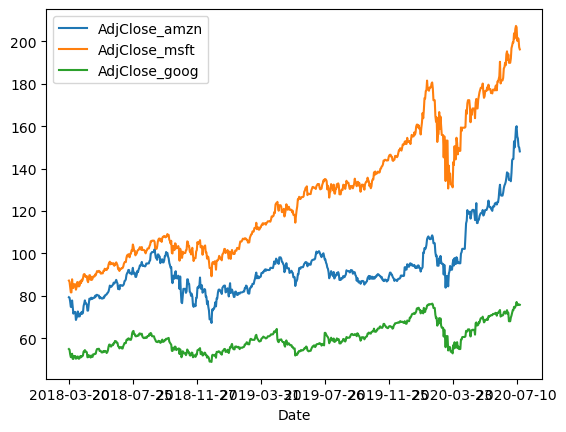

In [46]:
df[['AdjClose_amzn', 'AdjClose_msft', 'AdjClose_goog']].plot()

In [47]:
df2.to_excel("./news/weekly_news_amg_prices.xlsx")

<Axes: xlabel='Date'>

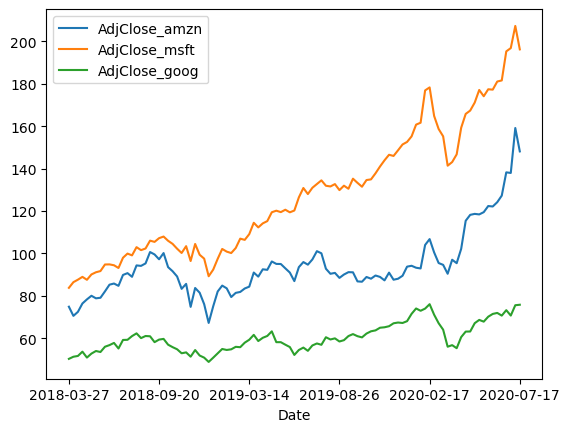

In [48]:
df2[['AdjClose_amzn', 'AdjClose_msft', 'AdjClose_goog']].plot()